In [583]:
import sqlite3
con = sqlite3.connect("J_SNOWMAN_4709336482318969.db")
cur = con.cursor()

# 处理评论

In [492]:
sql = "select count(*) from comments where id in(select MAX(id) from comments group by created_at,user_id)"

cur.execute(sql)
print(cur.fetchall())

[(11809,)]


In [3]:
sql = "select count(*) from comments"

cur.execute(sql)
print(cur.fetchall())

[(17809,)]


In [4]:
sql = '''
delete from comments
where id not in (
select t.max_id from
(select MAX(id) as max_id from comments group by created_at,user_id) as t)
'''
cur.execute(sql)
print(cur.fetchall())

[]


In [5]:
# 有效评论数量
sql = "select count(*) from comments"

cur.execute(sql)
print(cur.fetchall())

[(11809,)]


In [6]:
# 留言id数量
cur.execute("select COUNT(DISTINCT user_id) from comments")
print(cur.fetchall())

[(7656,)]


In [7]:
# 11月30日当天留言数量
sql = "select count(*) from comments where created_at like '%Nov%'"

cur.execute(sql)
print(cur.fetchall())

[(8837,)]


# 整理出有效用户

In [8]:
# 创建新的表
sql = '''
        CREATE TABLE users
        (
            id INTEGER  PRIMARY KEY AUTOINCREMENT,
            user_id varchar,
            user_name varchar
        )
    '''
cur.execute(sql)

OperationalError: table users already exists

In [13]:
# 插入从评论里整理出的用户
sql = '''
        insert into users(user_id,user_name) 
        select DISTINCT user_id,user_name from comments
    '''
cur.execute(sql)

In [14]:
sql = "select count(*) from users"

cur.execute(sql)
print(cur.fetchall())

[(7657,)]


# 运行时的一些处理

In [488]:
# 将用户id逐个放入数组
arr = []
sql = "select user_id from users"
cur.execute(sql)
row = cur.fetchone()
while row:
    arr.append(row[0])
    row = cur.fetchone()

In [489]:
# 找到目标id的索引序号
target_ID = '6604984750'
for idx, user_id in enumerate(arr):
    if user_id == target_ID:
        print(f'index of {target_ID} is {idx}')
        # assuming it can be found once - break
        break

index of 6604984750 is 6700


In [490]:
arr[6700:]

['6604984750',
 '6348082433',
 '5846583136',
 '5650963070',
 '3144153171',
 '7630051962',
 '6814134233',
 '7459120119',
 '5170596487',
 '1799754134',
 '7475490836',
 '1839574840',
 '5518743699',
 '1934295497',
 '7414222109',
 '7247579757',
 '2132208624',
 '5866646600',
 '6123571497',
 '5857922940',
 '3823456829',
 '7367430159',
 '6344085778',
 '6446753931',
 '7462823892',
 '2935855123',
 '5767138618',
 '6455268318',
 '5664171960',
 '3251715490',
 '5501870291',
 '2196200532',
 '5615269532',
 '3113455231',
 '5873292948',
 '7490804295',
 '2145891543',
 '7689377530',
 '1842853440',
 '7481767555',
 '6580957093',
 '2159834723',
 '3916120551',
 '6860907506',
 '7167895567',
 '6489757100',
 '7056641479',
 '5516986706',
 '5710111387',
 '7417273801',
 '5645315224',
 '5174234376',
 '2837491514',
 '1801892082',
 '5893040615',
 '5171028315',
 '6337298787',
 '3931499559',
 '5241710100',
 '7103204185',
 '5686037650',
 '5361487790',
 '3291516780',
 '1818184093',
 '2968132442',
 '1776639537',
 '60580977

# 关注超话情况统计

In [493]:
# 有多少人有关注超话
sql = "select count(DISTINCT user_id) from joinStopic"
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)
print(cur.fetchall())

[(7486,)]


In [535]:
# 最多人关注的超话前20
sql = "select Stopic_name,count(*) from joinStopic group by Stopic_name order by count(*) desc"
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)
X = []
Y = []

for i in range(0,20):
    result = cur.fetchone()
    X.append(result[0])
    Y.append(result[1])
    print(result)

X.reverse()
Y.reverse()

('莲理枝memi', 4156)
('目黑莲', 4002)
('SnowMan组合', 2935)
('道枝駿佑', 2404)
('消失的初恋', 2224)
('BKPP', 488)
('KinKrit', 483)
('博君一肖', 478)
('浪花男子', 456)
('日剧美丽的他', 448)
('王一博', 442)
('肖战', 425)
('向井康二', 384)
('龚俊', 366)
('佐久間大介', 354)
('村上真都raul', 353)
('莲理枝mechi', 342)
('mmkj', 332)
('易烊千玺', 242)
('渡边翔太', 233)


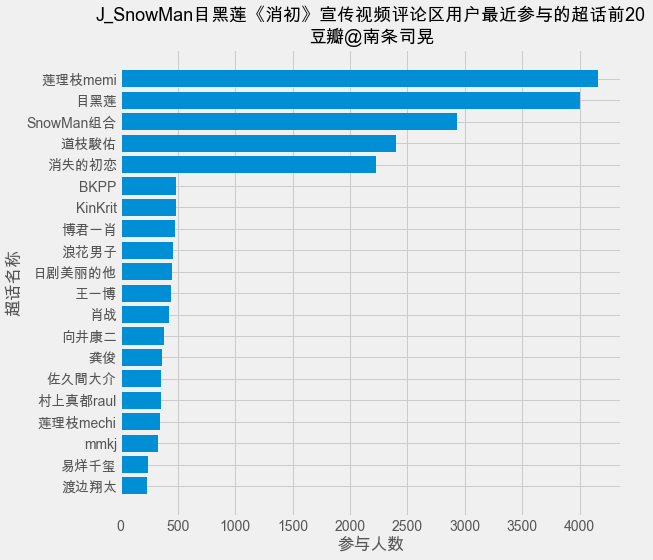

In [536]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(X, Y)
ax.set_title("J_SnowMan目黑莲《消初》宣传视频评论区用户最近参与的超话前20\n豆瓣@南条司晃", fontsize=18)
ax.set(xlabel='参与人数', ylabel='超话名称')
plt.show()

In [496]:
# 最多人关注的超话前50
sql = "select Stopic_name,count(*) from joinStopic group by Stopic_name order by count(*) desc"
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)
#X = []
#Y = []

for i in range(0,100):
    result = cur.fetchone()
    #X.append(result[0])
    #Y.append(result[1])
    print(result)

('莲理枝memi', 4156)
('目黑莲', 4002)
('SnowMan组合', 2935)
('道枝駿佑', 2404)
('消失的初恋', 2224)
('BKPP', 488)
('KinKrit', 483)
('博君一肖', 478)
('浪花男子', 456)
('日剧美丽的他', 448)
('王一博', 442)
('肖战', 425)
('向井康二', 384)
('龚俊', 366)
('佐久間大介', 354)
('村上真都raul', 353)
('莲理枝mechi', 342)
('mmkj', 332)
('易烊千玺', 242)
('渡边翔太', 233)
('朱一龙', 218)
('mmrl', 200)
('每日一善', 188)
('棉花美娃娃', 188)
('ohmnanon', 187)
('SamYu', 171)
('岩本照', 169)
('阿部亮平', 152)
('keitaeiji', 150)
('到了30岁还是处男似乎会变成魔法师', 148)
('哈利波特魔法觉醒', 143)
('mewgulf', 139)
('studyaccount', 138)
('王俊凯', 135)
('深泽辰哉', 135)
('ARASHI', 122)
('战山为王', 119)
('时代少年团', 112)
('光与夜之恋', 110)
('百香果种植基地', 106)
('周杰伦', 105)
('南北cp', 105)
('阴阳师手游', 103)
('蔡徐坤', 101)
('原耽推文', 101)
('188男团', 101)
('INTO1', 97)
('我的快乐源泉', 94)
('offgun', 93)
('阳光信用', 92)
('白敬亭', 92)
('闪耀暖暖', 90)
('王源', 90)
('杨宇腾', 90)
('文轩', 88)
('飞云系', 87)
('张艺兴', 87)
('原神', 87)
('EXO', 87)
('赤楚卫二', 86)
('江南百景图', 86)
('刘宇', 86)
('连琑反应', 84)
('天官赐福', 84)
('宫馆凉太', 83)
('Santa赞多', 83)
('王者荣耀', 80)
('恋与制作人', 80)
('鹿晗', 7

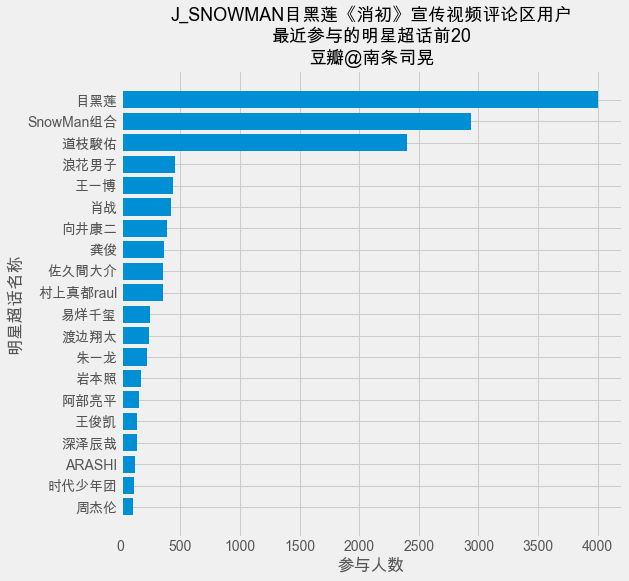

In [532]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(8, 8))
X = ['目黑莲','SnowMan组合','道枝駿佑','浪花男子','王一博','肖战','向井康二','龚俊','佐久間大介','村上真都raul'
     ,'易烊千玺','渡边翔太','朱一龙','岩本照','阿部亮平','王俊凯','深泽辰哉','ARASHI','时代少年团','周杰伦']
Y = [4002,2935,2404,456,442,425,384,366,354,353
     ,242,233,218,169,152,135,135,122,112,105]
X.reverse()
Y.reverse()
ax.barh(X, Y)
ax.set_title("J_SNOWMAN目黑莲《消初》宣传视频评论区用户\n最近参与的明星超话前20\n豆瓣@南条司晃", fontsize=18)
ax.set(xlabel='参与人数', ylabel='明星超话名称')
plt.show()

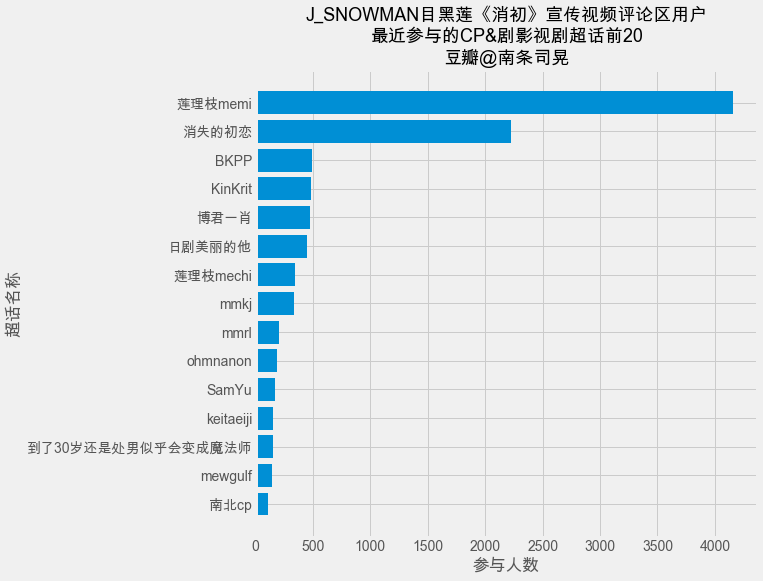

In [534]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(8, 8))
X = ['莲理枝memi','消失的初恋','BKPP','KinKrit','博君一肖','日剧美丽的他','莲理枝mechi','mmkj','mmrl','ohmnanon'
     ,'SamYu','keitaeiji','到了30岁还是处男似乎会变成魔法师','mewgulf','南北cp']
Y = [4156,2224,488,483,478,448,342,332,200,187
     ,171,150,148,139,105]
X.reverse()
Y.reverse()
ax.barh(X, Y)
ax.set_title("J_SNOWMAN目黑莲《消初》宣传视频评论区用户\n最近参与的CP&剧影视剧超话前20\n豆瓣@南条司晃", fontsize=18)
ax.set(xlabel='参与人数', ylabel='超话名称')
plt.show()

In [539]:
#关注目黑莲
sql = '''
select count(*)
    from (
    select user_id from joinStopic 
    where Stopic_name like'目黑莲'
    group by user_id 
    )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

meme = int(cur.fetchone()[0])
print(meme)

4001


In [498]:
sql = '''
select count(*)
    from (
    select user_id from joinStopic 
    where Stopic_name like'莲理枝memi'
    group by user_id 
    )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

memi = int(cur.fetchone()[0])
print(memi)

4155


In [499]:
sql = '''
select count(*)
    from (
    select user_id from joinStopic 
    where Stopic_name like'道枝駿佑'
    group by user_id 
    )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

micchi = int(cur.fetchone()[0])
print(micchi)

2403


In [500]:
# 同时关注 连理枝memi&目黑莲&道枝駿佑
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'莲理枝memi'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'目黑莲'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'道枝駿佑'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data111 = int(cur.fetchone()[0])
print(data111)

1412


In [501]:
# 同时关注 连理枝memi&目黑莲
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'莲理枝memi'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'目黑莲'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data101_111 = int(cur.fetchone()[0])
print(data101_111)
data101 = data101_111 - data111
print(data101)

2226
814


In [502]:
# 同时关注 连理枝memi&道枝
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'莲理枝memi'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'道枝駿佑'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data011_111 = int(cur.fetchone()[0])
print(data011_111)
data011 = data011_111 - data111
print(data011)

1939
527


In [503]:
# 同时关注 目黑莲&道枝
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'目黑莲'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'道枝駿佑'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data110_111 = int(cur.fetchone()[0])
print(data110_111)
data110 = data110_111 - data111
print(data110)

1717
305


In [504]:
data100 = meme-data110-data101-data111
data001 = memi-data101-data011-data111
data010 = micchi -data110-data011-data111

# 画图

In [505]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import numpy as np

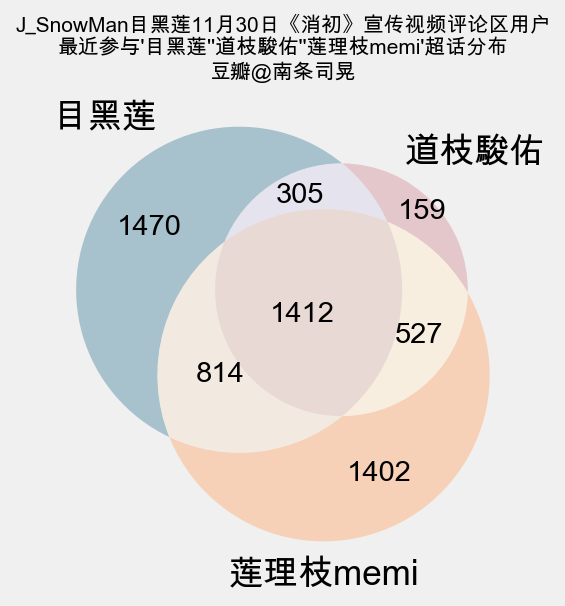

In [538]:
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
g=venn3(subsets = {'100': data100, '010': data010, '110': data110, '001': data001, '101': data101, '011': data011, '111': data111},
        set_labels = ("目黑莲", "道枝駿佑","莲理枝memi"),
        set_colors=("#6093AC", "#D8A0A6", "#FDB482"),
        alpha=0.5,
        normalize_to=1.0,
       )
plt.title("J_SnowMan目黑莲11月30日《消初》宣传视频评论区用户\n最近参与'目黑莲''道枝駿佑''莲理枝memi'超话分布\n豆瓣@南条司晃", fontsize=10)
plt.show()

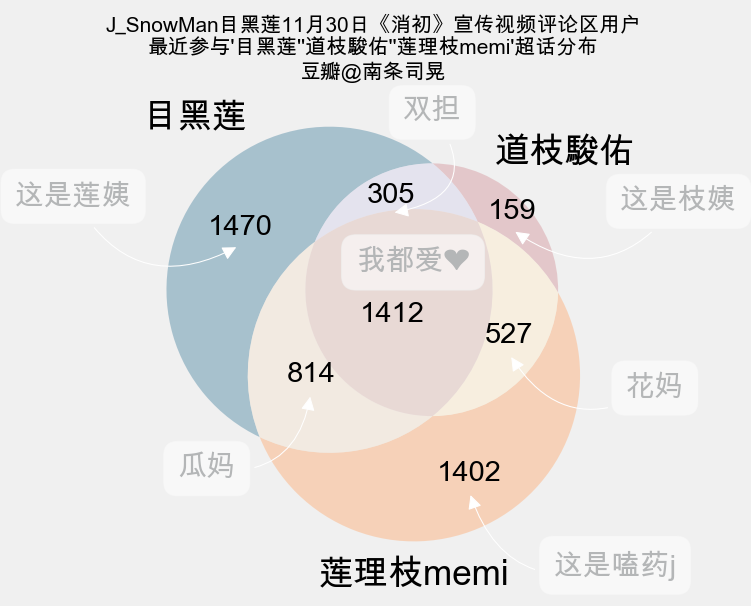

In [537]:
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
g=venn3(subsets = {'100': data100, '010': data010, '110': data110, '001': data001, '101': data101, '011': data011, '111': data111},
        set_labels = ("目黑莲", "道枝駿佑","莲理枝memi"),
        set_colors=("#6093AC", "#D8A0A6", "#FDB482"),
        alpha=0.5,
        normalize_to=1.0,
       )

#for i in list('100, 010, 110, 001, 101, 011, 111'.split(', ')):
#    g.get_label_by_id('%s'%i).set_text('%s'%i)#修改每个组分的文本
    
#然后就可以如同venn2中那样个性化设置了
#g.get_label_by_id('110').set_color('red')#1的颜色
#g.get_patch_by_id('110').set_edgecolor('red')
plt.annotate('这是莲姨', 
             color='#B4B6B7',
             xy=g.get_label_by_id('100').get_position() - np.array([0, 0.05]), 
             xytext=(-80,20),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#FFFFFF')#箭头属性设置
            )

plt.annotate('这是枝姨', 
             color='#B4B6B7',
             xy=g.get_label_by_id('010').get_position() - np.array([0, 0.05]), 
             xytext=(80,10),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='#FFFFFF')#箭头属性设置
            )

plt.annotate('这是嗑药j', 
             color='#B4B6B7',
             xy=g.get_label_by_id('001').get_position() - np.array([0, 0.05]), 
             xytext=(70,-40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='#FFFFFF')#箭头属性设置
            )

plt.annotate('瓜妈', 
             color='#B4B6B7',
             xy=g.get_label_by_id('101').get_position() - np.array([0, 0.05]), 
             xytext=(-50,-40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#FFFFFF')#箭头属性设置
            )

plt.annotate('花妈', 
             color='#B4B6B7',
             xy=g.get_label_by_id('011').get_position() - np.array([0, 0.05]), 
             xytext=(70,-20),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='#FFFFFF')#箭头属性设置
            )

plt.annotate('我都爱❤', 
             color='#B4B6B7',
             xy=g.get_label_by_id('111').get_position() - np.array([0, 0.05]), 
             xytext=(10,30),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6)#注释文字底纹
            )

plt.annotate('双担', 
             color='#B4B6B7',
             xy=g.get_label_by_id('110').get_position() - np.array([0, 0.05]), 
             xytext=(20,45),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.8',color='#FFFFFF')#箭头属性设置
            )
plt.title("J_SnowMan目黑莲11月30日《消初》宣传视频评论区用户\n最近参与'目黑莲''道枝駿佑''莲理枝memi'超话分布\n豆瓣@南条司晃", fontsize=10)
plt.show()

# 各位都在说什么呢

## 筛选评论

In [507]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import jieba

In [508]:
# 所有评论
sql = "select text from comments"

cur.execute(sql)
with open("comment_all.txt","a") as f:
    row = cur.fetchone()
    while row:
        f.write(row[0]+"\n")
        row = cur.fetchone()

In [557]:
# 只关注目黑没有关注莲理枝和道枝的用户的评论
sql = '''
select text
from comments 
where user_id in
(
        select user_id  from joinStopic 
        where Stopic_name like'目黑莲'
        group by user_id 
        except
        select user_id from joinStopic 
        where Stopic_name like'莲理枝memi'
        group by user_id 
        except 
        select user_id from joinStopic 
        where Stopic_name like'道枝駿佑'
        group by user_id
        )
'''

cur.execute(sql)
with open("comment_meme.txt","a") as f:
    row = cur.fetchone()
    while row:
        f.write(row[0]+"\n")
        row = cur.fetchone()

In [570]:
# 只关注道枝没有关注莲理枝和目黑的用户的评论
sql = '''
select text
from comments 
where user_id in
(
        select user_id  from joinStopic 
        where Stopic_name like'道枝駿佑'
        group by user_id 
        except
        select user_id from joinStopic 
        where Stopic_name like'莲理枝memi'
        group by user_id 
        except 
        select user_id from joinStopic 
        where Stopic_name like'目黑莲'
        group by user_id
        )
'''

cur.execute(sql)
with open("comment_micchi.txt","a") as f:
    row = cur.fetchone()
    while row:
        f.write(row[0]+"\n")
        row = cur.fetchone()

## 简单词云

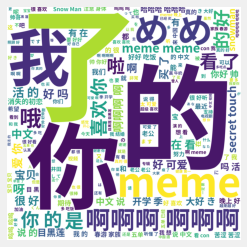

In [569]:
# open the file with "read" attribute
f_text = open('comment_meme.txt', 'r').read()
jieba.load_userdict(userdict)
res = jieba.cut(f_text,cut_all=False, HMM=True)						#split chinese characters using jieba package
res_text = ' '.join(res)					
#background_img = plt.imread('back.jpeg')
STOPWORDS.add('via')						 #add stop words

#generate the word cloud
wc = WordCloud(background_color="white",width=3000,height=3000,margin=2,stopwords=STOPWORDS, font_path='SourceHanSans-Bold.ttf').generate(res_text)

#show the image
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('comment_meme.png')

## 词频词云

In [584]:
# 导入扩展库
import re                           # 正则表达式库
import jieba                        # 结巴分词
import jieba.posseg                 # 词性获取
import collections                  # 词频统计库
import numpy                        # numpy数据处理库
from PIL import Image               # 图像处理库
import wordcloud                    # 词云展示库
import matplotlib.pyplot as plt     # 图像展示库（这里以plt代表库的全称）

In [585]:
# 主要功能自定义设置
Analysis_text = 'comment_all.txt'        # 分析文档
userdict = 'userdict.txt'             # 用户词典
StopWords = 'stopwords1893.txt'            # 停用词库
number = 150                          # 统计个数
Output = '词频.txt'                   # 输出文件
background = '词频背景.jpg'           # 词频背景

In [586]:
# 读取文件
fn = open(Analysis_text,'r',encoding = 'UTF-8')  # 打开文件
string_data = fn.read()                          # 读出整个文件
fn.close()                                       # 关闭文件

In [587]:
# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式（空格等）
string_data = re.sub(pattern, '', string_data)     # 将符合模式的字符去除

In [588]:
# 动态调整词典
# jieba.suggest_freq('消えた初恋', True)     #True表示该词不能被分割，False表示该词能被分割

# 添加用户词典
jieba.load_userdict(userdict)

In [589]:
# 文本分词
seg_list_exact = jieba.cut(string_data, HMM=True)    # 精确模式分词+HMM
object_list = []

In [590]:
# 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open(StopWords, 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表

In [591]:
# 词频统计
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(number)    # 获取前number个最高频的词

In [592]:
# 英文词性转中文词性字典：简洁版
En2Cn = {
    'a'    : '形容词',
    'ad'   : '形容词',
    'ag'   : '形容词',
    'al'   : '形容词',
    'an'   : '形容词',
    'b'    : '区别词',
    'bl'   : '区别词',
    'c'    : '连词',
    'cc'   : '连词',
    'd'    : '副词',
    'e'    : '叹词',
    'eng'  : '英文',
    'f'    : '方位词',
    'g'    : '语素',
    'h'    : '前缀',
    'i'    : '成语',
    'j'    : '简称略语',
    'k'    : '后缀',
    'l'    : '习用语',
    'm'    : '数词',
    'mq'   : '数量词',
    'n'    : '名词',
    'ng'   : '名词',
    'nl'   : '名词',
    'nr'   : '名词',
    'nr1'  : '名词',
    'nr2'  : '名词',
    'nrf'  : '名词',
    'nrfg' : '名词',    
    'nrj'  : '名词',
    'ns'   : '名词',
    'nsf'  : '名词',
    'nt'   : '名词',
    'nz'   : '名词',
    'o'    : '拟声词',
    'p'    : '介词',
    'pba'  : '介词',
    'pbei' : '介词',
    'q'    : '量词',
    'qt'   : '量词',
    'qv'   : '量词',
    'r'    : '代词',
    'rg'   : '代词',
    'rr'   : '代词',
    'rz'   : '代词',
    'rzs'  : '代词',
    'rzt'  : '代词',
    'rzv'  : '代词',
    'ry'   : '代词',
    'rys'  : '代词',
    'ryt'  : '代词',
    'ryv'  : '代词',
    's'    : '处所词',
    't'    : '时间词',
    'tg'   : '时间词',
    'u'    : '助词',
    'ude1' : '助词',
    'ude2' : '助词',
    'ude3' : '助词',
    'udeng': '助词',
    'udh'  : '助词',
    'uguo' : '助词',
    'ule'  : '助词',
    'ulian': '助词',
    'uls'  : '助词',
    'usuo' : '助词',
    'uyy'  : '助词',
    'uzhe' : '助词',
    'uzhi' : '助词',
    'v'    : '动词',
    'vd'   : '动词',
    'vf'   : '动词',
    'vg'   : '动词',
    'vi'   : '动词',
    'vl'   : '动词',
    'vn'   : '动词',
    'vshi' : '动词',
    'vx'   : '动词',
    'vyou' : '动词',
    'w'    : '标点符号',
    'wb'   : '标点符号',
    'wd'   : '标点符号',
    'wf'   : '标点符号',
    'wj'   : '标点符号',
    'wh'   : '标点符号',
    'wkz'  : '标点符号',
    'wky'  : '标点符号',
    'wm'   : '标点符号',
    'wn'   : '标点符号',
    'wp'   : '标点符号',
    'ws'   : '标点符号',
    'wt'   : '标点符号',
    'ww'   : '标点符号',
    'wyz'  : '标点符号',
    'wyy'  : '标点符号',
    'x'    : '字符串',
    'xu'   : '字符串',
    'xx'   : '字符串',
    'y'    : '语气词',
    'z'    : '状态词',
    'un'   : '未知词',
}

In [593]:
# 输出至工作台，并导出“词频.txt”文件
print ('\n词语\t词频\t词性')
print ('——————————')
fileOut = open(Output,'w',encoding='UTF-8')     # 创建文本文件；若已存在，则进行覆盖
fileOut.write('词语\t词频\t词性\n')
fileOut.write('——————————\n')
count = 0
for TopWord,Frequency in word_counts_top:                       # 获取词语和词频
    for POS in jieba.posseg.cut(TopWord):                       # 获取词性
        if count == number:
            break
        print(TopWord + '\t',str(Frequency) + '\t',list(En2Cn.values())[list(En2Cn.keys()).index(POS.flag)])                    # 逐行输出数据
        fileOut.write(TopWord + '\t' + str(Frequency) + '\t' + list(En2Cn.values())[list(En2Cn.keys()).index(POS.flag)] + '\n') # 逐行写入str格式数据
        count += 1
fileOut.close()                                                 # 关闭文件


词语	词频	词性
——————————
meme	 9924	 字符串
第二季	 5904	 数词
消失的初恋	 5679	 字符串
中文	 5253	 名词
め	 4797	 字符串
喜欢	 4656	 动词
啊啊啊	 4629	 名词
🖤	 4455	 字符串
た	 3684	 字符串
说	 3330	 动词
哈哈哈	 3291	 拟声词
季	 2925	 名词
开学	 2616	 名词
え	 2448	 字符串
初恋	 2394	 动词
消	 2373	 动词
可爱	 2334	 动词
期待	 2301	 动词
い	 2283	 字符串
真的	 2130	 副词
爱	 1953	 动词
好看	 1842	 动词
目黑莲	 1836	 字符串
中国	 1833	 名词
し	 1743	 字符串
す	 1725	 字符串
て	 1689	 字符串
📢	 1596	 字符串
希望	 1593	 动词
苦涩	 1548	 形容词
老公	 1518	 名词
买	 1479	 动词
家族	 1461	 名词
呜呜	 1455	 习用语
春游	 1443	 名词
超级	 1434	 区别词
好好	 1401	 副词
と	 1323	 字符串
き	 1302	 字符串
で	 1269	 字符串
📣	 1245	 字符串
ま	 1242	 字符串
哈哈哈哈	 1236	 拟声词
想	 1188	 动词
宝贝	 1179	 名词
太	 1170	 副词
五单	 1155	 数词
五单	 1155	 名词
好听	 1140	 动词
く	 1116	 字符串
井田	 1104	 名词
支持	 1104	 动词
の	 1086	 字符串
touch	 1074	 英文
っ	 1053	 字符串
加油	 1041	 动词
ん	 1032	 字符串
ー	 1020	 字符串
你好	 1011	 习用语


ValueError: 'touch' is not in list

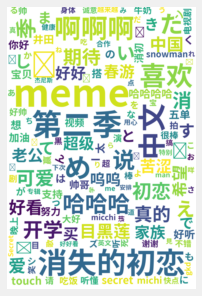

In [594]:
# 词频展示
#mask = numpy.array(Image.open(background))      # 定义词频背景
wc = wordcloud.WordCloud(
    font_path = 'SourceHanSans-Bold.ttf', # 设置字体（这里选择“仿宋”）
    background_color='white',                   # 背景颜色
    #mask = mask,                                # 文字颜色+形状（有mask参数再设定宽高是无效的）
    width=1000,height=1500,
    max_words = number,                         # 显示词数
    max_font_size = 200                         # 最大字号
)

wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
# wc.recolor(color_func=wordcloud.ImageColorGenerator(mask))                       # 将词云颜色设置为背景图方案
plt.figure('词云')                                                               # 弹框名称与大小
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
wc.to_file('comment_all_f.png')
plt.axis('off')                                                                  # 关闭坐标轴
plt.show()  

# 结束

In [582]:
cur.close()
con.commit()
con.close()